# convert data to zarr format

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt

import crocosi.postp as pp

In [2]:
from dask.distributed import Client, LocalCluster
#
#cluster = LocalCluster()
#
from dask_jobqueue import PBSCluster
# get processes with large amount of memory
cluster = PBSCluster(processes=8, cores=16,
                     walltime='04:00:00')
w = cluster.scale(jobs=5)
#
client = Client(cluster)

In [6]:
client

Client Scheduler: tcp://10.148.1.39:46430 Dashboard: http://10.148.1.39:8787/status,Cluster Workers: 40 Cores: 80 Memory: 600.00 GB


---

## load data

In [7]:
root_path = '/home/c11-data/Test_aponte/jetn/'
run = 'jet_cfg1_wp6_m1_4km_500a1000j'

In [8]:
r = pp.Run(root_path+run, outputs='all', read_zarr=False,
           verbose=2)

Analysing directory /home/c11-data/Test_aponte/jetn/jet_cfg1_wp6_m1_4km_500a1000j
Found 5 segments
Found 5 grid files
Found 25 his files
Found 10 surf files
Found 10 sta2 files
Found 10 sta1 files
Found 5 ave files
Found 50 swath files
Parameters detected in croco.in :
  time step = 300.0 s
  theta_s = 5.0
  theta_b = 0.0
  Hc = 100.0 m
  rho0 = 1000.0 kg/m^3
Parameters detected in output.mpi :
  H = 4000.0 m
  Found 9 columns in output.mpi:
    STEP
    time[DAYS]
    KINETIC_ENRG
    POTEN_ENRG
    TOTAL_ENRG
    NET_VOLUME
    trd
    ENSTROPHY
    BTKIN_ENRG
Opening datasets:  ['grid', 'his', 'surf', 'sta2', 'sta1', 'ave', 'swath']
  grid - 0.0 GB
  his - 15.9 GB
  surf - 89.3 GB
  sta2 - 0.1 GB
  sta1 - 0.1 GB
  ave - 3.0 GB
  swath - 251.1 GB
Grid size: (L ,M, N) = (258, 722, 50)


---

## store to zarr format

In [10]:
%time r.store_zarr(mode='w')

- grid stored
  location: /home/c11-data/Test_aponte/jetn/jet_cfg1_wp6_m1_4km_500a1000j/zarr/grid.zarr 
  size:     0.0 GB
  typical chunks: (722,258) for size (722,258)
- his stored
  location: /home/c11-data/Test_aponte/jetn/jet_cfg1_wp6_m1_4km_500a1000j/zarr/his.zarr 
  size:     13.0 GB
  typical chunks: (2,50,722,258) for size (25,50,722,258)
- surf stored
  location: /home/c11-data/Test_aponte/jetn/jet_cfg1_wp6_m1_4km_500a1000j/zarr/surf.zarr 
  size:     78.2 GB
  typical chunks: (2400,722,258) for size (24000,722,258)
- sta2 stored
  location: /home/c11-data/Test_aponte/jetn/jet_cfg1_wp6_m1_4km_500a1000j/zarr/sta2.zarr 
  size:     0.1 GB
  typical chunks: (72000,50) for size (72000,50)
- sta1 stored
  location: /home/c11-data/Test_aponte/jetn/jet_cfg1_wp6_m1_4km_500a1000j/zarr/sta1.zarr 
  size:     0.1 GB
  typical chunks: (72000,50) for size (72000,50)
- ave stored
  location: /home/c11-data/Test_aponte/jetn/jet_cfg1_wp6_m1_4km_500a1000j/zarr/ave.zarr 
  size:     2.6 GB
  t

---
## reload fields and make a plot

In [11]:
r = pp.Run(root_path+run, outputs='all', verbose=2)

Analysing directory /home/c11-data/Test_aponte/jetn/jet_cfg1_wp6_m1_4km_500a1000j
Found 5 segments
Found 5 grid files
Found 25 his files
Found 10 surf files
Found 10 sta2 files
Found 10 sta1 files
Found 5 ave files
Found 50 swath files
Parameters detected in croco.in :
  time step = 300.0 s
  theta_s = 5.0
  theta_b = 0.0
  Hc = 100.0 m
  rho0 = 1000.0 kg/m^3
Parameters detected in output.mpi :
  H = 4000.0 m
  Found 9 columns in output.mpi:
    STEP
    time[DAYS]
    KINETIC_ENRG
    POTEN_ENRG
    TOTAL_ENRG
    NET_VOLUME
    trd
    ENSTROPHY
    BTKIN_ENRG
Opening datasets:  ['grid', 'his', 'surf', 'sta2', 'sta1', 'ave', 'swath']
  grid - 0.0 GB
  his - 15.9 GB
  surf - 89.3 GB
  sta2 - 0.1 GB
  sta1 - 0.1 GB
  ave - 3.0 GB
  swath - 251.1 GB
Grid size: (L ,M, N) = (258, 722, 50)


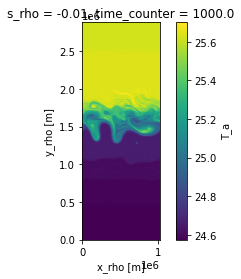

In [14]:
ax = plt.subplot()
r['his'].T_a.isel(time=-1,s_rho=-1).plot(ax=ax)
ax.set_aspect('equal','box')

---

## delete netcdf files

Obviously you need to be sure of yourself to do this ...

In [10]:
r.delete_nc()

/home/datawork-lops-osi/equinox/jetn/tmp/jet_cfg1_wp6_4km_0a1000j/t1/ave_00010101-00010410.nc deleted
/home/datawork-lops-osi/equinox/jetn/tmp/jet_cfg1_wp6_4km_0a1000j/t2/ave_00010101-00010410.nc deleted
/home/datawork-lops-osi/equinox/jetn/tmp/jet_cfg1_wp6_4km_0a1000j/t1/surf_00010101-00010219.nc deleted
/home/datawork-lops-osi/equinox/jetn/tmp/jet_cfg1_wp6_4km_0a1000j/t1/surf_00010220-00010410.nc deleted
/home/datawork-lops-osi/equinox/jetn/tmp/jet_cfg1_wp6_4km_0a1000j/t2/surf_00010101-00010219.nc deleted
/home/datawork-lops-osi/equinox/jetn/tmp/jet_cfg1_wp6_4km_0a1000j/t2/surf_00010220-00010410.nc deleted
/home/datawork-lops-osi/equinox/jetn/tmp/jet_cfg1_wp6_4km_0a1000j/t1/grid.nc deleted
/home/datawork-lops-osi/equinox/jetn/tmp/jet_cfg1_wp6_4km_0a1000j/t2/grid.nc deleted
/home/datawork-lops-osi/equinox/jetn/tmp/jet_cfg1_wp6_4km_0a1000j/t1/his_00010101-00010120.nc deleted
/home/datawork-lops-osi/equinox/jetn/tmp/jet_cfg1_wp6_4km_0a1000j/t1/his_00010121-00010209.nc deleted
/home/data

---

In [15]:
cluster.close()

distributed.client - ERROR - Failed to reconnect to scheduler after 10.00 seconds, closing client
_GatheringFuture exception was never retrieved
future: <_GatheringFuture finished exception=CancelledError()>
concurrent.futures._base.CancelledError
